In [174]:
from selenium import webdriver 
import time
import pandas as pd

In [175]:
driver = webdriver.Chrome("C:/chromedriver.exe")
driver.get("https://www.instagram.com/accounts/login/" )

In [179]:
instagram_id="your_id"
instagram_pw="your_password"

_id = driver.find_element_by_name('username')
_id.send_keys(instagram_id)
time.sleep(2)

_password = driver.find_element_by_name('password')
_password.send_keys(instagram_pw)
time.sleep(2)

In [180]:
login_button = driver.find_element_by_css_selector('.sqdOP.L3NKy.y3zKF').click()
time.sleep(5) # 로그인 버튼 누르기

driver.find_element_by_css_selector('.sqdOP.yWX7d.y3zKF').click()
time.sleep(3) # 로그인 저장 나중에

driver.find_element_by_css_selector('.aOOlW.HoLwm').click()
time.sleep(3) # 설정 나중에

In [181]:
_keyword = 'chelsea' # 검색할 키워드
driver.get('https://www.instagram.com/explore/tags/' + _keyword + '/')

In [182]:
driver.find_element_by_css_selector('div.v1Nh3.kIKUG._bz0w').click() #첫번째 게시물 열기
time.sleep(5)

In [183]:
results = []
count = 200
for i in range(count):
    data = driver.find_elements_by_css_selector('a.xil3i') # 해쉬태그 정보 저장
    for j in range(len(data)):
        results.append(data[j].text.replace("#","")) # '#'없애기
    
    if (i+1)%10 == 0: 
        print('{}번째 게시물 완료'.format(i+1))
    driver.find_element_by_css_selector('a._65Bje.coreSpriteRightPaginationArrow').click() #다음 게시물로 이동
    time.sleep(3)

10번째 게시물 완료
20번째 게시물 완료
30번째 게시물 완료
40번째 게시물 완료
50번째 게시물 완료
60번째 게시물 완료
70번째 게시물 완료
80번째 게시물 완료
90번째 게시물 완료
100번째 게시물 완료
110번째 게시물 완료
120번째 게시물 완료
130번째 게시물 완료
140번째 게시물 완료
150번째 게시물 완료
160번째 게시물 완료
170번째 게시물 완료
180번째 게시물 완료
190번째 게시물 완료
200번째 게시물 완료


In [184]:
results_str = " ".join(results) #결과값 list to string

<BarContainer object of 30 artists>

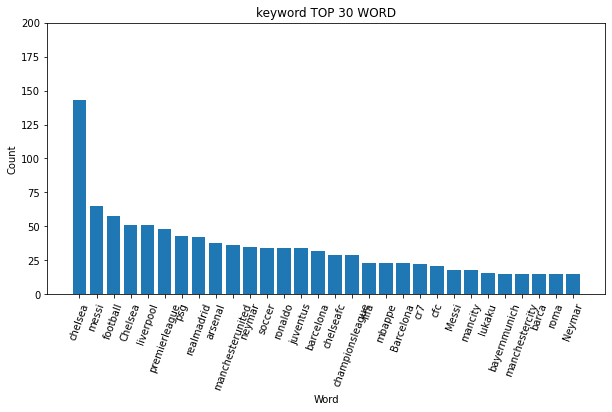

In [185]:
import nltk
tokens = results_str.split(" ")
text = nltk.Text(tokens)
topWord = text.vocab().most_common(30) 
count = 30
xlist = [a[0] for a in topWord[:count ]]
ylist = [a[1] for a in topWord[:count ]]
    
plt.figure(figsize = (10,5))
plt.xlabel('Word')
plt.xticks(rotation=70) # x축 라벨 회전
plt.ylabel('Count')
plt.title('keyword TOP '+str(count)+' WORD')
plt.ylim([0, 200])
plt.bar(xlist,ylist)

In [186]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [187]:
wordcloud = WordCloud(max_font_size=100).generate(results_str)

(-0.5, 399.5, 199.5, -0.5)

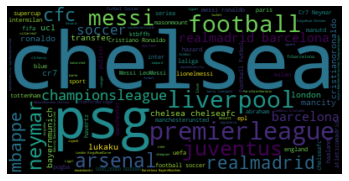

In [188]:
fig = plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')